In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
new_data=pd.get_dummies(data)
new_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
x=new_data[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes',	'region_northeast',	'region_northwest',	'region_southeast','region_southwest']]
y=new_data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Preprocessing Data:(Normalization and Standardization)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)
#Create the data:
x_=data.drop('charges',axis=1)
y_=data['charges']

#Build our train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x_,y_,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(x_train)

#Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder(Eğitim ve test verilerini normalleştirme (MinMaxScaler) ve OneHotEncoder ile dönüştürün)
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [ ]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [ ]:
name_of_columns=np.concatenate([np.array(['age','bmi','children']),ct.named_transformers_['onehotencoder'].get_feature_names_out(input_features=['sex','smoker','region'])])

In [ ]:
x_train_1=pd.DataFrame(x_train_normal,columns=name_of_columns)

In [ ]:
x_test_1=pd.DataFrame(x_test_normal,columns=name_of_columns)

In [ ]:
x_test_1[ct.named_transformers_['onehotencoder'].get_feature_names_out(input_features=['sex','smoker','region'])]=x_test_1[ct.named_transformers_['onehotencoder'].get_feature_names_out(input_features=['sex','smoker','region'])].astype('int')

In [ ]:
x_train_1.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1,0,1,0,0,1,0,0
1,0.630435,0.224913,0.0,1,0,1,0,1,0,0,0
2,0.739130,0.239440,0.0,1,0,1,0,0,0,1,0
3,0.456522,0.493947,1.0,1,0,1,0,0,0,1,0
4,0.782609,0.148238,0.6,1,0,1,0,0,1,0,0


In [ ]:
x_train_1[ct.named_transformers_['onehotencoder'].get_feature_names_out(input_features=['sex','smoker','region'])]=x_train_1[ct.named_transformers_['onehotencoder'].get_feature_names_out(input_features=['sex','smoker','region'])].astype('int')

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(len(x_train_1.iloc[0,:]),)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                384       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_1=model.fit(x_train_1,y_train,epochs=150)

Epoch 1/150
34/34 [==============================] - 2s 5ms/step - loss: 9316.1602 - mae: 9316.1602
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 4711.5005 - mae: 4711.5005
Epoch 3/150
34/34 [==============================] - 0s 5ms/step - loss: 3531.0156 - mae: 3531.0156
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 3387.8547 - mae: 3387.8547
Epoch 5/150
34/34 [==============================] - 0s 2ms/step - loss: 3355.4460 - mae: 3355.4460
Epoch 6/150
34/34 [==============================] - 0s 5ms/step - loss: 3202.7251 - mae: 3202.7251
Epoch 7/150
34/34 [==============================] - 0s 7ms/step - loss: 3049.2778 - mae: 3049.2778
Epoch 8/150
34/34 [==============================] - 0s 5ms/step - loss: 2996.1924 - mae: 2996.1924
Epoch 9/150
34/34 [==============================] - 0s 6ms/step - loss: 2861.1089 - mae: 2861.1089
Epoch 10/150
34/34 [==============================] - 0s 5ms/step - loss: 2644.0969 - mae: 2644.0969

In [ ]:
model.evaluate(x_test_1,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1827.4929 - mae: 1827.4929


[1827.492919921875, 1827.492919921875]

In [ ]:
y_train.reset_index(drop=True)
y_test.reset_index(drop=True)

0       9095.06825
1       5272.17580
2      29330.98315
3       9301.89355
4      33750.29180
          ...     
263    47055.53210
264    12222.89830
265     6067.12675
266    63770.42801
267     9872.70100
Name: charges, Length: 268, dtype: float64

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x_train_1.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1,0,1,0,0,1,0,0
1,0.630435,0.224913,0.0,1,0,1,0,1,0,0,0
2,0.739130,0.239440,0.0,1,0,1,0,0,0,1,0
3,0.456522,0.493947,1.0,1,0,1,0,0,0,1,0
4,0.782609,0.148238,0.6,1,0,1,0,0,1,0,0


In [ ]:
#Making a new model for duty:
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Input(shape=(len(x_train_1.loc[560,:]),)))
model_1.add(tf.keras.layers.Dense(32,activation='relu'))
model_1.add(tf.keras.layers.Dense(64,activation='relu'))
model_1.add(tf.keras.layers.Dense(128,activation='relu'))
model_1.add(tf.keras.layers.Dropout(0.4))
model_1.add(tf.keras.layers.Dense(64,activation='relu'))
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10),loss=tf.keras.losses.mae,metrics=['mae'])

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                384       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19137 (74.75 KB)
Trainable params: 19137

In [ ]:
model_1.fit(x_train_1,y_train,epochs=112)

Epoch 1/112
34/34 [==============================] - 0s 5ms/step - loss: 9232.9053 - mae: 9232.9053
Epoch 2/112
34/34 [==============================] - 0s 5ms/step - loss: 9211.1807 - mae: 9211.1807
Epoch 3/112
34/34 [==============================] - 0s 5ms/step - loss: 9190.3594 - mae: 9190.3594
Epoch 4/112
34/34 [==============================] - 0s 5ms/step - loss: 9169.6885 - mae: 9169.6885
Epoch 5/112
34/34 [==============================] - 0s 6ms/step - loss: 9150.3125 - mae: 9150.3125
Epoch 6/112
34/34 [==============================] - 0s 6ms/step - loss: 9130.8232 - mae: 9130.8232
Epoch 7/112
34/34 [==============================] - 0s 6ms/step - loss: 9111.4736 - mae: 9111.4736
Epoch 8/112
34/34 [==============================] - 0s 6ms/step - loss: 9092.2051 - mae: 9092.2051
Epoch 9/112
34/34 [==============================] - 0s 7ms/step - loss: 9073.2568 - mae: 9073.2568
Epoch 10/112
34/34 [==============================] - 0s 5ms/step - loss: 9054.2500 - mae: 9054.2500

In [ ]:
history_2=model_1.fit(x_train_1,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 6ms/step - loss: 8300.2002 - mae: 8300.2002
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 8298.2129 - mae: 8298.2129
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 8296.4199 - mae: 8296.4199
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 8293.9355 - mae: 8293.9355
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 8292.4600 - mae: 8292.4600
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 8290.6191 - mae: 8290.6191
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8289.1729 - mae: 8289.1729
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 8288.0049 - mae: 8288.0049
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 8287.0840 - mae: 8287.0840
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 8286.0312 - mae: 8286.0312

In [ ]:
model_1.evaluate(x_test_1,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8641.5400 - mae: 8641.5400


[8641.5400390625, 8641.5400390625]

In [ ]:
history_1.history

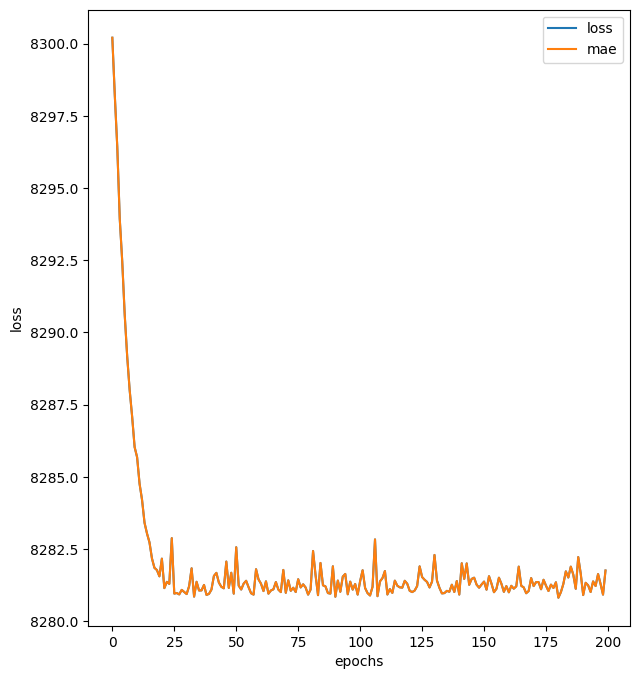

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(7,8))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

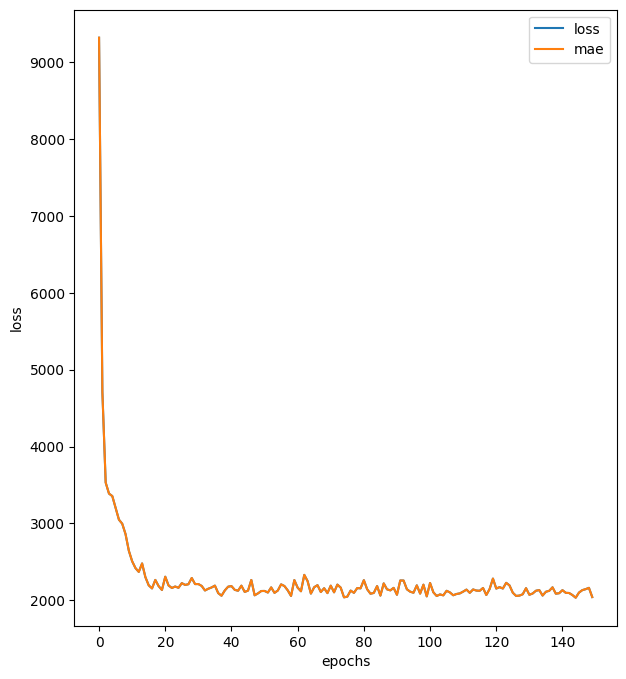

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(7,8))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
model.fit(x_train_normal,y_train)

34/34 [==============================] - 1s 3ms/step - loss: 6412.7031 - mae: 6412.7031


In [ ]:
model.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3668.1924 - mae: 3668.1924


[3668.1923828125, 3668.1923828125]